we will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015 in units of millimeters (mm). 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
#rainfall data of Sheffield weather station
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])


In [11]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

#function to generate a single boostrap replicate
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

#function to generate many bs replicates

def draw_bs_reps(data, func, size = 1):
    bs_replicate = np.empty(size)
    for i in range(size):
        bs_replicate[i] = bootstrap_replicate_1d(data, func)
    return bs_replicate

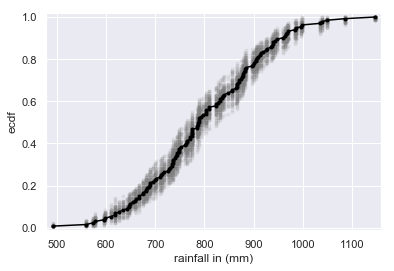

In [10]:
for _ in range(50):
    bs_sample = np.random.choice(rainfall, size = len(rainfall))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker = '.', linestyle = 'none', color = 'gray', alpha = 0.1)
#plotting the original data    
x_obs, y_obs = ecdf(rainfall)
_ = plt.plot(x_obs, y_obs, marker = '.', color = 'black')
_ = plt.xlabel('rainfall in (mm)')
_ = plt.ylabel('ecdf')
plt.margins(0.02)
plt.show()

We can see that bootstrap samples lies around the original sample which also define the spread of the data.

With the help bootstrap sample we can calculate bootstrap replicate so that we can find the confidence interval of a summary statistic. </p> 
According to the central limit theorum if we acquire the data and apply the summary statistic to it and do this process again and again then our distribution will be normal and this distribution is called Sampling distribution.

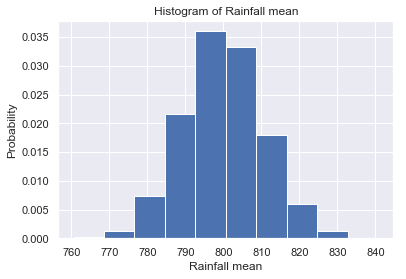

In [14]:
np.random.seed(42)
# Checking whether the sampling distribution obtained from bootstrap is normal or not

# generating bootstrap replicates of rainfall mean
rainfall_means = draw_bs_reps(rainfall, np.mean, size = 10000)
#plotting histogram of rainfall means
plt.figure()
_ = plt.hist(rainfall_means, density = True)
_ = plt.xlabel('Rainfall mean')
_ = plt.ylabel('Probability')
plt.title('Histogram of Rainfall mean')



The above plot prove the central limit theorum. To further see if it resembles the normal distriubtion or not we will cdf plot

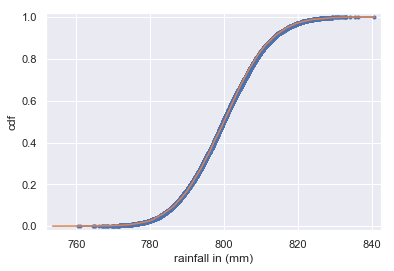

In [15]:
#generating data to plot ecdf
x_obs, y_obs = ecdf(rainfall_means)

#generating normal observations for cdf
mu = np.mean(rainfall_means)
sigma = np.std(rainfall_means) #this is called standard error for sampling distribution

samples_rainfall_mean = np.random.normal(mu, sigma, size = 10000)
x_th, y_th = ecdf(samples_rainfall_mean)

#plotting both the original and theoritical samples
_ = plt.plot(x_obs, y_obs, marker = '.')
_ = plt.plot(x_th, y_th)
_ = plt.xlabel('rainfall in (mm)')
_ = plt.ylabel('cdf')
plt.margins(0.02)
plt.show()

The perfect symmetry of the observations further prove the central limit theorum.

### Now generating 95% confidence interval of the rainfall mean

In [16]:
ci = np.percentile(rainfall_means, [2.5, 97.5])
ci

array([779.76992481, 820.95043233])

The above confidence interval says that <b> we are 95% confidence that the rainfall mean of population lies in the range of 779.76 and 820.95</b>